<a href="https://colab.research.google.com/github/danielamll/PIA_RED_NEURONALES/blob/main/CNNSIMPLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFORMACIÓN DE LA GPU 

In [ ]:
#Información de la gpu que se usa para correr la red neuronal
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue May 17 19:44:32 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# INSTALACIÓN DE KAGGLE POR API PARA DESACARGA DE DATASETS

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                   title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39           7745       1018  0.9375           
mdmahmudulhasansuzan/students-adaptability-level-in-online-education  Students Adaptability Level in Online Education    6KB  2022-04-16 04:46:28           5133        131  1.0              
muratkokludataset/rice-image-dataset                                  Rice Image Dataset                               219MB  2022-04-03 02:12:00           1494        831  0.875            
paradisejoy/top-hits-spotify-from-20002019   

In [ ]:
! kaggle datasets download "aryashah2k/breast-ultrasound-images-dataset" --force

 95% 186M/195M [00:04<00:00, 39.2MB/s]
100% 195M/195M [00:04<00:00, 44.3MB/s]


In [ ]:
! unzip 'breast-ultrasound-images-dataset'

Archive:  breast-ultrasound-images-dataset.zip
  inflating: Dataset_BUSI_with_GT/benign/benign (1).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (1)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (103).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (103)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (104).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (104)_mask.png  
  inflating: Data

# IMPORTAR LIBRERÍAS

In [ ]:
import numpy as np
import pandas as pd
import os, glob

In [ ]:

from tensorflow import keras
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import load_img ,img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,AveragePooling2D,BatchNormalization
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.layers import Flatten,Dropout,SpatialDropout2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

from tensorflow.keras import layers, activations, optimizers, losses, metrics, initializers, models
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV3Small, MobileNet, InceptionV3, EfficientNetB7
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input, decode_predictions
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# PREPARACIÓN DE PARÁMETROS Y PREPARACIÓN DE DATASET PARA FUNCIONAMIENTO

In [ ]:
seed = 42 #random seed para siempre tener las mismas imagenes divididas al azar manteniendo los mismos sets (referencia a hitchhikers guide to the universe)
tf.random.set_seed(seed)
np.random.seed(seed)

In [ ]:
dir_path = r'/content/Dataset_BUSI_with_GT'
IMAGE_SHAPE = (244, 244)

In [ ]:
def prepare_image(file):
    img = image.load_img(file, target_size=IMAGE_SHAPE)
    img_array = image.img_to_array(img)
    return tf.keras.applications.efficientnet.preprocess_input (img_array)


In [ ]:
directories = os.listdir(dir_path) #función para lectura de los documentos dentro de todos los folders

files = [] # lista para guardar las imagenes 
labels = [] # lista para guardar las etiquetas las cuales corresopnden al folder de donde vienen

In [ ]:
for folder in directories:
    
    fileList = glob.glob(dir_path + '/'+ folder + '/*')
    labels.extend([folder for l in fileList])
    files.extend(fileList)
pruebali = [labels[:5]]
pruebalf = [labels[-5:]]
print(pruebali)
print(pruebalf)
prueba = [files[:5]]
print(prueba)

len(files), len(labels)

[['malignant', 'malignant', 'malignant', 'malignant', 'malignant']]
[['benign', 'benign', 'benign', 'benign', 'benign']]
[['/content/Dataset_BUSI_with_GT/malignant/malignant (71).png', '/content/Dataset_BUSI_with_GT/malignant/malignant (38).png', '/content/Dataset_BUSI_with_GT/malignant/malignant (109).png', '/content/Dataset_BUSI_with_GT/malignant/malignant (155)_mask.png', '/content/Dataset_BUSI_with_GT/malignant/malignant (91).png']]


(1578, 1578)

In [ ]:
selected_files = []
selected_labels = []

for file, label in zip(files, labels):
    if '_mask' not in file:
        selected_files.append(file)
        selected_labels.append(label)
#eliminar las máscaraspara trabajar únicamente con las imágenes 
    
len(selected_files), len(selected_labels)

(780, 780)

In [ ]:
selected_files = []
selected_labels = []

for file, label in zip(files, labels):
    if 'mask' not in file:
        selected_files.append(file)
        selected_labels.append(label) #guardar nuevo est sin máscaras

    
len(selected_files), len(selected_labels)

(780, 780)

In [ ]:
#crear diccionario para imagen y su etiqueta (objeto y su llave)
images = {'image': [], 'target': []}


for i, (file, label) in enumerate(zip(selected_files, selected_labels)):
    images['image'].append(prepare_image(file))
    images['target'].append(label)



In [ ]:
#convertir las listas en un numpyarray para poder trabajar con ellas para la división de set de entrenamiento y set de prueba
images['image'] = np.array(images['image'])
images['target'] = np.array(images['target'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

images['target'] = le.fit_transform(images['target'])

classes = le.classes_
print(f'the target classes are: {classes}')

x_train, x_test, y_train, y_test = train_test_split(images['image'], images['target'], test_size = .25)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


the target classes are: ['benign' 'malignant' 'normal']
(585, 244, 244, 3) (195, 244, 244, 3) (585,) (195,)


# CREACIÓN DEL MODELO

In [ ]:
x = models.Sequential()

In [ ]:
model = models.Sequential()

# CAPAS CONVOLUCIONALES
model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(20, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

#CAPAS COMPLETAMENTE CONECTADAS
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(20, activation='softmax'))

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)


rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience= 5, factor= 0.5, min_lr= 1e-6, verbose=1)



In [ ]:
model.compile(optimizer='Adam',
              loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), callbacks=[early_stop, rlrop]) 
print(model.summary())

Epoch 1/5
19/19 [==============================] - 21s 415ms/step - loss: 2.6248 - accuracy: 0.4034 - val_loss: 88.6416 - val_accuracy: 0.4769 - lr: 0.0010
Epoch 2/5
19/19 [==============================] - 6s 297ms/step - loss: 1.7123 - accuracy: 0.6684 - val_loss: 30.8133 - val_accuracy: 0.5282 - lr: 0.0010
Epoch 3/5
19/19 [==============================] - 6s 298ms/step - loss: 1.0980 - accuracy: 0.8205 - val_loss: 13.4170 - val_accuracy: 0.5487 - lr: 0.0010
Epoch 4/5
19/19 [==============================] - 6s 298ms/step - loss: 0.6704 - accuracy: 0.9282 - val_loss: 5.3394 - val_accuracy: 0.5692 - lr: 0.0010
Epoch 5/5
19/19 [==============================] - 6s 298ms/step - loss: 0.3895 - accuracy: 0.9573 - val_loss: 4.3590 - val_accuracy: 0.5795 - lr: 0.0010
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 244, 244, 256)     7168      
      

# RESULTADOS

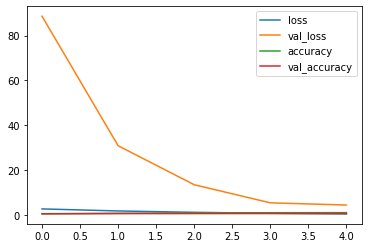

In [ ]:
hist = history.history

plt.plot(hist['loss'], label=  'loss')
plt.plot(hist['val_loss'], label = 'val_loss')
plt.plot(hist['accuracy'], label='accuracy')
plt.plot(hist['val_accuracy'], label='val_accuracy')
plt.legend()